# Intro to CNN Basics

Aim is to intro some basic concepts about Convoluted Neural Nets (CNNs) in deep ML, such as:<p>
    
- **Convolution Layers** and how they work <p>
    
- Filters (or *convultion kernels*)<p>    
    
- **Pooling Layers** and Aggregation functions (`Max` and `Avg`)<p>

We'll use an image from an inbuilt dataset 'Chinese Temple' for convenience.

Behold.

In [1]:
# setup chunk
import numpy as np
import os
import time

from sklearn.datasets import load_sample_image

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# utility funcs to plot grayscale and RGB
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")
    
import tensorflow as tf    

C:\Users\20052\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\20052\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\20052\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\20052\AppData\Local\Conti

## Convolutional Layer

Plan to demo a conv layer is as follows. 

First, we use sklearn's `load_sample_image()` func to load 2 inbuilt color images (chinese temple and a flower).

Then, we create 2 filters (vertical and horiz, as an illustration) and apply them to both image susig the conv layer. 

The applying is done using `tf.nn.conv2d()` func described below.

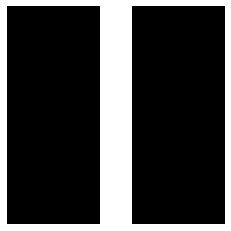

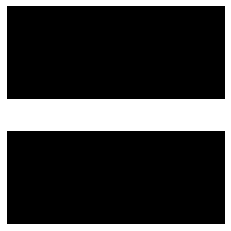

In [2]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")  # load sample img
china.shape  # view its dimns
plt.imshow(china)  # view img itself

# take a subset of the img 2 focus on
image = china[150:220, 130:250]; image.shape 
plt.imshow(image)  # view revised img

image_grayscale = image.mean(axis=2).astype(np.float32) # convert img 2 grayscale
plt.imshow(image_grayscale)  # view grayscale version also

## convert to CNN input format
height, width, channels = image.shape
images = image_grayscale.reshape(1, height, width, 1)
images.shape

# create 2 filters - verti & horiz
filters = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
filters[:, 3, 0, 0] = 1  # vertical line for filtering in vertical features only
plot_image(filters[:, :, 0, 0])  # plot filter and see
plt.show()

# horiz line for horiz feature filtering
filters[3, :, 0, 1] = 1  
plot_image(filters[:, :, 0, 1])  # plot filter and see
plt.show()

We've created (as an illustration) 2 filters - one that filters in only vertically oriented lines or other features in the image, the other likewise for horizontal. Plots above illustrate that.

Next, we create a graph with input X plus a conv layer applying the above 2 filters. 

The result of sapplying a filter through a conv layer onto an image is called a **feature map**.  We'll plot and see what these look like below.

Behold.

0.02  secs



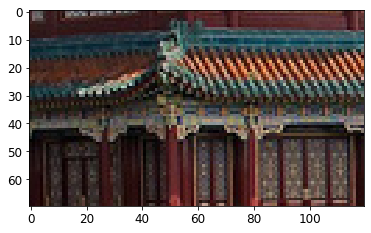

In [6]:
# hand-code filters and place them in TF
X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(filters)  
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

start = time.time()
# output obj below contains feature maps
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

end = time.time()    
print(round(end - start, 2), " secs\n")  # 2.11 secs

# original plot
plt.imshow(image)

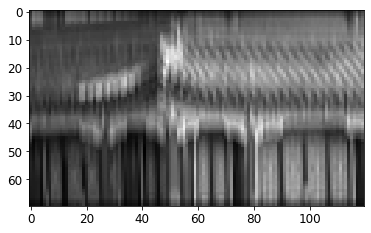

In [7]:
# Vertical filter feature_map
plt.imshow(output[0, :, :, 0], cmap="gray", interpolation="nearest")

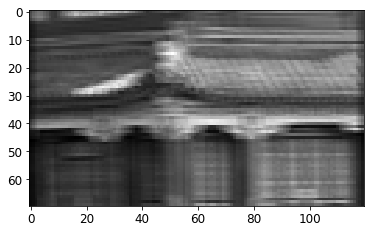

In [8]:
# Horiz filter feature_map
plt.imshow(output[0, :, :, 1], cmap="gray", interpolation="nearest")

Well, what do the feature_maps look like?

Notice how: <p>

- (1) the vertically filtered feature map contains only vertically oriented pixel-structures<p> 
    
- (2) ==> which combined with otherly oriented pixel structures <p>
    
- (3) ==> could well become the locus of higher-level feature construction.<p>  

- (4) Likewise for the horizontally oriented pixel-structures. Etc.

## Using TF to create Filters 

While in the above simple example, we manually created the filters, in a real CNN we would let the training algo discover the best filters automatically.

TF's `tf.layers.conv2d()` func:<p> 
    
-(i) creates the filters variable (called *kernel*) for us, <p>
-(ii) intializes it randomly. <p>
    
Below, as an illustration, I code two 7x7 feature maps using 2x2 **strides** (how many pixels must the filter slide before the next measurement).

Behold.


In [13]:
# Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

# Using TF to create 2 filters
X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
print(X, "\n")

# define conv layer parms
conv = tf.layers.conv2d(X, # placeholder input
                        filters=2,  # num_filters to discover
                        kernel_size=7,  # 7x7 is filter dimn
                        strides=[2,2],  # filter moves 2 pixels horiz & 2 vertically per op
                        padding="SAME")

# initialize TF
init = tf.global_variables_initializer()

# run TF with timing
start = time.time()
with tf.Session() as sess:
    init.run()
    output_conv = sess.run(conv, feed_dict={X: dataset})

end = time.time()
print(round(end - start), " secs\n")  # just 1 sec

# explore output
print("output_conv.shape: ", output_conv.shape, "\n")
print("Verti filter:\n", output_conv[0, 0:3, 0:3, 0], "\n")
print("Horiz filter:\n", output_conv[0, 0:3, 0:3, 1], "\n")

Tensor("Placeholder_7:0", shape=(?, 427, 640, 3), dtype=float32) 

0  secs

output_conv.shape:  (2, 214, 320, 2) 

Verti filter:
 [[ 41.789898  64.73132   63.74048 ]
 [187.05356  219.11426  220.12656 ]
 [250.03421  233.73798  233.14923 ]] 

Horiz filter:
 [[  29.45906   102.992805  103.877594]
 [-139.24423  -126.05945  -126.225006]
 [ -96.15118   -75.307755  -73.9556  ]] 



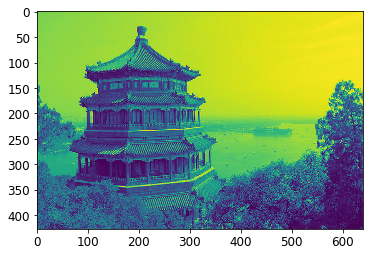

In [14]:
# trying subplots in 1 plot
china_grayscale = china.mean(axis=2).astype(np.float32) # convert img 2 grayscale

# Original plot in grayscale
plt.imshow(china_grayscale)

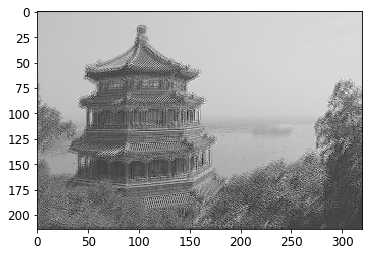

In [15]:
# Vertical filter feature_map
plt.imshow(output_conv[0, :, :, 0], cmap="gray", interpolation="nearest")

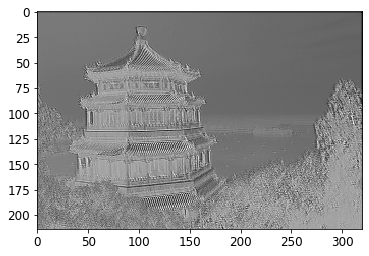

In [16]:
# Horiz filter feature_map
plt.imshow(output_conv[0, :, :, 1], cmap="gray", interpolation="nearest")

Not hard to see from the images above what the filters do. 

They pattern-search for low-level features and regularities when applied to an image's pixels. The output is still very large. Enter the Pooling Layer. 

## Pooling Layer

The pooling layer applies a pooling filter to this output and lets pass only certain features while discarding the rest.

In other words, a `max()` or `mean()` pooling filter *subsamples* only the maximum or the average value of each 7x7 pixel chunk from the output thereby shrinking the output's size massively. 

Let's see this in action.


In [18]:
# defining parms
print(output_conv.shape)
batch_size, height, width, channels = output_conv[0:1, :, :, 0:1].shape

# defining filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

start = time.time()

# max_pooling and avg_pooling
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
avg_pool = tf.nn.avg_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

with tf.Session() as sess:
    output_max_pool = sess.run(max_pool, feed_dict={X: output_conv[0:1, :, :, 0:1]}) # output_conv
    output_avg_pool = sess.run(avg_pool, feed_dict={X: output_conv[0:1, :, :, 0:1]}) # output_conv

end = time.time()
print(round(end - start), " secs")  # 0 secs

(2, 214, 320, 2)
0  secs


That didn't take long now, did it?

Above, we applied both max_pooling and avg_pooling ethods in a pooling layer to conv layer output.

## Pooling applied to Conv Output

How better too understand what (Max or Avg) Pooling does than to view what happens to conv output above? 

Behold.

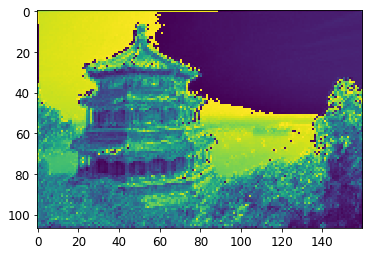

In [19]:
# Max_ pooling the vertically filtered conv output
plt.imshow(output_max_pool[0,:,:,0].astype(np.uint8))

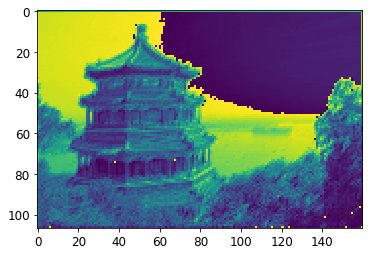

In [20]:
# Same result after avg_ pooling
plt.imshow(output_avg_pool[0,:,:,0].astype(np.uint8))

P.S. For some reason, in Py unlike in R, I always get this yellow-greenish tinge rather than true grayscale in grayscale images. Bear with this, for now.

What Pooling does can be guessed from the above.

### How Pooling works

The input to the pooling layer was the conv layer's filtered output. We demo-ed 2 filters there - vertical & horizontal and so got 2-image output list.

I considered only vertically filtered conv output for the above demo. I applied 2 pooling tupes - `max_pooling()` and `avg_pooling()`. 

Max_pooling picks only 1 pixel - that with thge max value in the filter. Likewise, avg_pooling pickls only 1 value (the pixel mean) for each 7x7 pooling filter we apply to the conv output.

Easy to see that we are massively shrinking input and dropping pixels. We filter-in and retain only the maximum (avg) valued pixels from each pass of each conv filter on the original image.

Thus, we are progressively stripping the overly rich original image pixels into simpler, sharper low-level features (feature_maps) and thereafter, slowly building up higher-level feature representations by combining and pooling them.

Now scale this scenario up by large numbers of conv layers and pooling layers and you can see how even complex images can be broken down into rich self-learned high-level representations.

Models can be trained in this way to recognize high-level features ('dog', 'car' etc) and these models can then be extended to virgin or never-before-seen data (for the machine). We're heading there next inour object detection sub-module.

Back to the slides and full speed ahead.

Voleti